## Assignment Questions

__Q1. What is the mathematical formula for a linear SVM?__

__Ans)__ The mathematical formula for a linear SVM (Support Vector Machine) is as follows:

Given a training dataset with input features x and corresponding binary class labels y (where y ∈ {-1, 1}), the linear SVM aims to find a hyperplane represented by a weight vector w and a bias term b that separates the two classes with the maximum margin.

The decision function of a linear SVM is defined as:

f(x) = sign(w • x + b)

Where:

* f(x) represents the predicted class label for the input feature vector x.
* w is the weight vector perpendicular to the hyperplane.
* b is the bias term that determines the offset of the hyperplane from the origin.
* • represents the dot product between the weight vector w and the input feature vector x.

__Q2. What is the objective function of a linear SVM?__

__Ans)__ The objective function of a linear SVM (Support Vector Machine) is to maximize the margin between the classes while minimizing the classification errors. It can be formulated as an optimization problem that seeks to find the optimal values for the weight vector and bias term.

The objective function of a linear SVM can be expressed as:

minimize: 1/2 ||w||^2 + C Σ(max(0, 1 - y_i(w • x_i + b)))

subject to: y_i(w • x_i + b) ≥ 1 - ξ_i, for all i

Where:

* w is the weight vector.
* b is the bias term.
* C is the regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification errors.
* x_i is the i-th training instance.
* y_i is the corresponding binary class label (-1 or 1) for x_i.
* ξ_i is the slack variable that allows for misclassification or errors in the margin.
* ||w||^2 represents the squared L2 norm of the weight vector.

By solving the optimization problem associated with the objective function, the linear SVM finds the optimal weight vector and bias term that define the decision boundary with the maximum margin, separating the classes as accurately as possible.

__Q3. What is the kernel trick in SVM?__

__Ans)__  The kernel trick in SVM (Support Vector Machines) is a technique that allows nonlinear relationships between input features to be effectively captured without explicitly transforming the data into a higher-dimensional space. It enables SVMs to operate in a high-dimensional feature space while avoiding the computational cost of explicitly calculating the transformed features.

The kernel trick is based on the concept of kernel functions. A kernel function is a measure of similarity between two input feature vectors in the original input space. It computes the inner product or similarity measure between the feature vectors without explicitly computing their coordinates in a higher-dimensional space.

By using a kernel function, the SVM implicitly performs the transformation of the input features into a higher-dimensional space, where the data might be more linearly separable. This means that SVMs can model complex relationships and decision boundaries by effectively working with the kernel function without explicitly computing the transformed feature vectors.

__Q4. What is the role of support vectors in SVM Explain with example__

__Ans)__ The support vectors play a crucial role in SVM (Support Vector Machines) as they are the data points that lie closest to the decision boundary or hyperplane. These support vectors are the key elements that determine the location and orientation of the decision boundary and have a significant impact on the SVM model's performance and generalization.

In SVM, the objective is to find the hyperplane that maximizes the margin between the two classes while correctly classifying the training data. The support vectors are the data points that lie on the margin or are misclassified. They represent the most challenging or influential instances that contribute to defining the decision boundary.

The role of support vectors can be explained through an example. Let's consider a binary classification problem with two classes: positive (+) and negative (-). The goal is to separate these classes with a decision boundary.

__Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?__

__Ans)__ 

1. Hyperplane:
In SVM, a hyperplane is a decision boundary that separates the data points of different classes. In a binary classification problem, it is a line in a 2D space or a hyperplane in higher-dimensional spaces. The hyperplane is represented by the equation w • x + b = 0, where w is the weight vector, x is the input feature vector, and b is the bias term.
Example:
Consider a 2D dataset with two classes, red (+) and blue (-). The hyperplane (decision boundary) is a line that separates the classes. The equation of the hyperplane is w • x + b = 0.

2. Marginal Plane:
The marginal plane, also known as the supporting hyperplane, is a parallel plane to the hyperplane that runs closest to the data points of each class. It defines the margin between the classes. In a binary classification problem, there is a marginal plane associated with each class.
Example:
Using the same dataset as before, the marginal plane is a line parallel to the hyperplane but closest to the support vectors (data points on or near the margin).

3. Soft Margin:
Soft margin SVM allows for some misclassification or errors in the margin. It introduces slack variables (ξ) to allow a certain amount of misclassification, making the SVM more flexible. The C parameter controls the trade-off between maximizing the margin and allowing misclassifications.
Example:
Consider a dataset with overlapping classes that cannot be perfectly separated by a hyperplane. A soft margin SVM allows for a more flexible decision boundary by allowing some data points to be misclassified or fall within the margin.

4. Hard Margin:
Hard margin SVM aims to find a decision boundary that perfectly separates the classes with no misclassifications or errors within the margin. It assumes that the data is linearly separable without any overlap.
Example:
Consider a dataset with classes that are perfectly separable by a hyperplane without any misclassifications.

Q6. SVM Implementation through Iris dataset.

Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.

- Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
-  Train a linear SVM classifier on the training set and predict the labels for the testing setl
-  Compute the accuracy of the model on the testing setl
-  Plot the decision boundaries of the trained model using two of the featuresl
- Try different values of the regularisation parameter C and see how it affects the performance of the model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # Considering only the first two features for simplicity
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Using scikit-learn implementation of SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [4]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


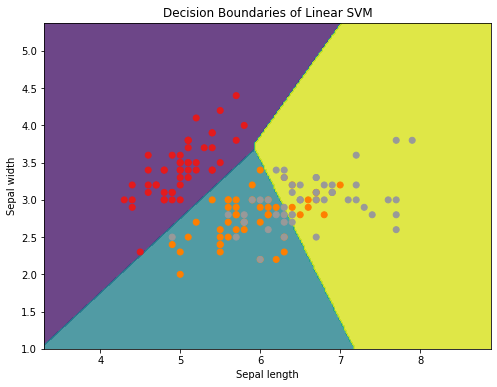

In [5]:
# Create a meshgrid of points to plot the decision boundaries
h = 0.02  # Step size for meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on the meshgrid points
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision Boundaries of Linear SVM')
plt.show()

In [6]:
C_values = [0.1, 1, 10, 100]  # List of C values to try

for C in C_values:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("C =", C, ", Accuracy:", accuracy)

C = 0.1 , Accuracy: 0.8333333333333334
C = 1 , Accuracy: 0.9
C = 10 , Accuracy: 0.9
C = 100 , Accuracy: 0.9
